### Project Overview: Analyzing Climate Change in Africa

In this project, we'll be working with the **'Climate Change in Africa' dataset**, provided by the U.S. Global Change Research Program. This dataset contains valuable historical data on daily minimum, maximum, and average temperature fluctuations across five African countries: **Egypt, Tunisia, Cameroon, Senegal,** and **Angola**, spanning from **1980 to 2023**.

📊 **Dataset Description**: The data offers insights into temperature trends and patterns across the selected countries, presenting an opportunity to explore and visualize climate variations over the years.

➡️ [**Dataset Link**](https://drive.google.com/file/d/1I8eV4-8p61CNNlVJzzho2xeoZ5-P7Q0F/view)

---

### Instructions

1. **Load the Dataset**  
   Begin by importing the dataset into a DataFrame using Python.

2. **Data Cleaning**  
   Perform necessary data cleaning to ensure accuracy and consistency in your analysis.

3. **Line Chart Visualization**  
   Create a line chart to display the average temperature fluctuations in **Tunisia** and **Cameroon**. Analyze and interpret the observed trends.

4. **Time Frame Focus (1980-2005)**  
   Zoom in on the data between **1980 and 2005**, and customize the axes labels for better clarity.

5. **Histograms of Temperature Distribution**  
   Generate histograms showing the temperature distribution in **Senegal**, comparing the periods **1980-2000** and **2000-2023** within the same figure. Summarize the key insights.

6. **Country-Wise Temperature Visualization**  
   Choose the most appropriate chart type to represent the **average temperature per country**.

7. **Exploratory Analysis**  
   Formulate your own questions about the dataset and explore answers using relevant visuals.


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing necessary libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Load the dataset

In [5]:
# Load the dataset into a DataFrame
df = pd.read_csv('Africa_climate_change.csv')

# Display the first few rows of the dataset to confirm it has loaded correctly
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


### EDA and Cleaning

In [10]:
# Brief description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [5]:
# A summary statistics of all the columns in the df
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE,464815,15938,20150619 000000,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP,177575.0,NaN,NaN,NaN,0.120941,0.486208,0.0,0.0,0.0,0.01,19.69
TAVG,458439.0,NaN,NaN,NaN,77.029838,11.523634,-49.0,70.0,80.0,85.0,110.0
TMAX,363901.0,NaN,NaN,NaN,88.713969,13.042631,41.0,81.0,90.0,99.0,123.0
TMIN,332757.0,NaN,NaN,NaN,65.548262,11.536547,12.0,58.0,68.0,74.0,97.0
COUNTRY,464815,5,Senegal,183262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df["COUNTRY"] == 'Tunisia'].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE,79301,15932,20230823 000000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP,64899.0,NaN,NaN,NaN,0.039182,0.206503,0.0,0.0,0.0,0.0,12.6
TAVG,79301.0,NaN,NaN,NaN,67.736422,12.772479,-49.0,57.0,67.0,79.0,105.0
TMAX,62209.0,NaN,NaN,NaN,78.513013,14.481664,41.0,66.0,78.0,90.0,123.0
TMIN,55257.0,NaN,NaN,NaN,57.169426,12.017871,12.0,47.0,57.0,67.0,90.0
COUNTRY,79301,1,Tunisia,79301,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Display 30 random rows
df.sample(n = 20)

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY,Year,Month,Day
79318,1988-10-23,0.08,83.0,95.000000,69.000000,Cameroon,1988,Oct,23
54092,1986-02-16,0.00,89.0,100.000000,71.766118,Senegal,1986,Feb,16
347123,2013-05-13,0.00,86.0,96.000000,69.000000,Egypt,2013,May,13
127842,1993-08-03,0.87,82.0,90.000000,72.000000,Senegal,1993,Aug,3
263524,2006-03-21,0.00,76.0,91.000000,60.000000,Egypt,2006,Mar,21
89927,1989-11-01,0.00,64.0,81.000000,49.000000,Tunisia,1989,Nov,1
429101,2020-04-10,0.00,91.0,111.000000,75.000000,Senegal,2020,Apr,10
208364,2001-01-11,0.00,58.0,74.000000,41.000000,Egypt,2001,Jan,11
200810,2000-03-27,0.00,86.0,99.000000,71.000000,Senegal,2000,Mar,27
400271,2017-09-30,0.00,74.0,85.336007,61.850550,Egypt,2017,Sep,30


In [16]:
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d %H%M%S', errors = 'coerce')

In [18]:
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,NaN,54.0,61.0,43.0,Tunisia
1,1980-01-01,NaN,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,NaN,50.0,55.0,43.0,Tunisia
4,1980-01-01,NaN,75.0,91.0,NaN,Cameroon


### Handling the missing values

In [20]:
df['COUNTRY'].unique()

array(['Tunisia', 'Cameroon', 'Senegal', 'Egypt', 'Angola'], dtype=object)

In [22]:
# Group by country and calculate summary statistics for TAVG
country_tavg_stats = df.groupby('COUNTRY')['TAVG'].agg(['mean', 'std'])

# Display the summary statistics
country_tavg_stats

,mean,std
COUNTRY,,
Angola,75.930017,5.053930
Cameroon,80.315806,7.098227
Egypt,73.839069,12.512259
Senegal,82.964651,6.407171
Tunisia,67.736422,12.772479


In [24]:
# Group by country and calculate summary statistics for TMAX
country_tmax_stats = df.groupby('COUNTRY')['TMAX'].agg(['mean', 'std'])

# Display the summary statistics
country_tmax_stats

,mean,std
COUNTRY,,
Angola,85.366856,5.105685
Cameroon,90.482738,7.103048
Egypt,85.336007,13.485580
Senegal,95.455874,8.113836
Tunisia,78.513013,14.481664


In [26]:
# Group by country and calculate summary statistics for TMIN
country_tmin_stats = df.groupby('COUNTRY')['TMIN'].agg(['mean', 'std'])

# Display the summary statistics
country_tmin_stats

,mean,std
COUNTRY,,
Angola,67.364686,7.520188
Cameroon,69.267707,8.081078
Egypt,61.850550,12.249302
Senegal,71.766118,6.554121
Tunisia,57.169426,12.017871


- We can group the dataset by country and then fill in the missing values for temperature columns using the mean for that specific country, since temperatures can vary significantly by region

###### Note that we can go further to groupby particular months of the year for each country, but we stop here for now

In [28]:
# Fill missing temperature values with the mean of each country
df['TAVG'] = df.groupby('COUNTRY')['TAVG'].transform(lambda x: x.fillna(x.mean()))
df['TMAX'] = df.groupby('COUNTRY')['TMAX'].transform(lambda x: x.fillna(x.mean()))
df['TMIN'] = df.groupby('COUNTRY')['TMIN'].transform(lambda x: x.fillna(x.mean()))

# Check if the missing values are filled
print(df.isnull().sum())

DATE            0
PRCP       287240
TAVG            0
TMAX            0
TMIN            0
COUNTRY         0
dtype: int64


##### Before we replace the missing values in PRCP let's see if there're relationships with the other columns

In [30]:
# To check the correlation between temperature and precipitation

correlation_tavg_prcp = df[['TAVG', 'PRCP']].corr().iloc[0, 1]
print(f"Correlation between TAVG and PRCP: {correlation_tavg_prcp}")

correlation_tmax_prcp = df[['TMAX', 'PRCP']].corr().iloc[0, 1]
print(f"Correlation between TMAX and PRCP: {correlation_tmax_prcp}")

correlation_tmin_prcp = df[['TMIN', 'PRCP']].corr().iloc[0, 1]
print(f"Correlation between TMIN and PRCP: {correlation_tmin_prcp}")

Correlation between TAVG and PRCP: 0.056556901870254264
Correlation between TMAX and PRCP: 0.037313974098472286
Correlation between TMIN and PRCP: 0.12432116760554228


The results show a very weak correlation let's check for countries

##### Relationship with countries

In [32]:
# Group by country and calculate correlation between PRCP and TAVG
country_prcp_tavg_corrs = df.groupby('COUNTRY').apply(lambda x: x['PRCP'].corr(x['TAVG'])).reset_index(name='PRCP_TAVG_Corr')

# Group by country and calculate correlation between PRCP and TMIN
country_prcp_tmin_corrs = df.groupby('COUNTRY').apply(lambda x: x['PRCP'].corr(x['TMIN'])).reset_index(name='PRCP_TMIN_Corr')

# Group by country and calculate correlation between PRCP and TMAX
country_prcp_tmax_corrs = df.groupby('COUNTRY').apply(lambda x: x['PRCP'].corr(x['TMAX'])).reset_index(name='PRCP_TMAX_Corr')

# Merge the correlation results into a single DataFrame
country_corrs = pd.merge(country_prcp_tavg_corrs, country_prcp_tmin_corrs, on='COUNTRY')
country_corrs = pd.merge(country_corrs, country_prcp_tmax_corrs, on='COUNTRY')


country_corrs

,COUNTRY,PRCP_TAVG_Corr,PRCP_TMIN_Corr,PRCP_TMAX_Corr
0,Angola,-0.061291,-0.038334,0.044403
1,Cameroon,-0.103467,0.001837,-0.129075
2,Egypt,-0.096805,-0.043519,-0.097444
3,Senegal,-0.107801,-0.020613,-0.125811
4,Tunisia,-0.097896,-0.037888,-0.109160


##### Still no correlation

In [34]:
# Group by country and calculate summary statistics for PRCP
country_prcp_stats = df.groupby('COUNTRY')['PRCP'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])

# Display the summary statistics
country_prcp_stats

,mean,median,min,max,std,count
COUNTRY,,,,,,
Angola,0.104949,0.00,0.0,15.35,0.475049,2924
Cameroon,0.412796,0.08,0.0,19.69,0.909221,15649
Egypt,0.018206,0.00,0.0,9.93,0.165231,47647
Senegal,0.243219,0.00,0.0,19.29,0.677917,46456
Tunisia,0.039182,0.00,0.0,12.60,0.206503,64899


We see that there's a variation in the PRCP values across the countries

##### Replace missing values with the median precipitation for each country

In [36]:
# Calculate the median precipitation for each country
median_prcp_by_country = df.groupby('COUNTRY')['PRCP'].median()

# Define a function to fill missing values with the country-specific median
def fill_missing_prcp(row):
    if pd.isna(row['PRCP']):
        return median_prcp_by_country[row['COUNTRY']]
    else:
        return row['PRCP']

# Apply the function to fill missing values
df['PRCP'] = df.apply(fill_missing_prcp, axis=1)

# Verify the changes
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.00,54.0,61.0,43.000000,Tunisia
1,1980-01-01,0.00,49.0,55.0,41.000000,Tunisia
2,1980-01-01,0.00,72.0,86.0,59.000000,Cameroon
3,1980-01-01,0.00,50.0,55.0,43.000000,Tunisia
4,1980-01-01,0.08,75.0,91.0,69.267707,Cameroon


## Visualizations

### Create a line chart to display the average temperature fluctuations in Tunisia and Cameroon.

In [37]:
# Extract year, month, and day
df['Year'] = df['DATE'].dt.year
#df['Month'] = df['DATE'].dt.month
# Format the month names as "Jan", "Feb", etc.
df['Month'] = df['DATE'].dt.strftime('%b')
df['Day'] = df['DATE'].dt.day

df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY,Year,Month,Day
0,1980-01-01,0.00,54.0,61.0,43.000000,Tunisia,1980,Jan,1
1,1980-01-01,0.00,49.0,55.0,41.000000,Tunisia,1980,Jan,1
2,1980-01-01,0.00,72.0,86.0,59.000000,Cameroon,1980,Jan,1
3,1980-01-01,0.00,50.0,55.0,43.000000,Tunisia,1980,Jan,1
4,1980-01-01,0.08,75.0,91.0,69.267707,Cameroon,1980,Jan,1


In [38]:
# Filter the data for Tunisia and Cameroon
df_filtered = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

# Group by 'YEAR' and 'COUNTRY', then calculate the average temperature
df_yearly = df_filtered.groupby(['Year', 'COUNTRY'])['TAVG'].mean().reset_index()

df_yearly

,Year,COUNTRY,TAVG
0,1980,Cameroon,78.263660
1,1980,Tunisia,64.865427
2,1981,Cameroon,78.163377
3,1981,Tunisia,65.981908
4,1982,Cameroon,77.375319
...,...,...,...
83,2021,Tunisia,69.400552
84,2022,Cameroon,80.730216
85,2022,Tunisia,70.038356
86,2023,Cameroon,82.601143


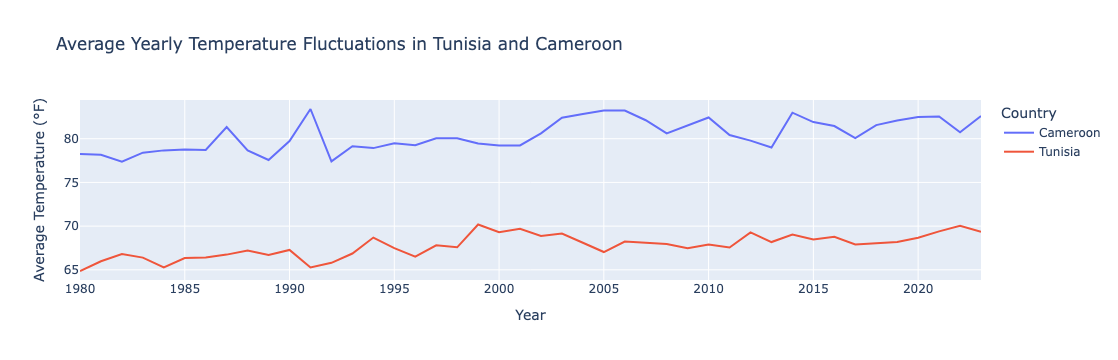

In [46]:
# Filter the data for Tunisia and Cameroon
df_filtered = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

# Group by 'YEAR' and 'COUNTRY', then calculate the average temperature
df_yearly = df_filtered.groupby(['Year', 'COUNTRY'])['TAVG'].mean().reset_index()

# Create the line chart
fig = px.line(df_yearly, x='Year', y='TAVG', color='COUNTRY',
              title='Average Yearly Temperature Fluctuations in Tunisia and Cameroon',
              labels={'Year': 'Year', 'TAVG': 'Average Temperature (°F)'})

fig.update_layout(legend_title_text='Country')
fig.show()

#### By month

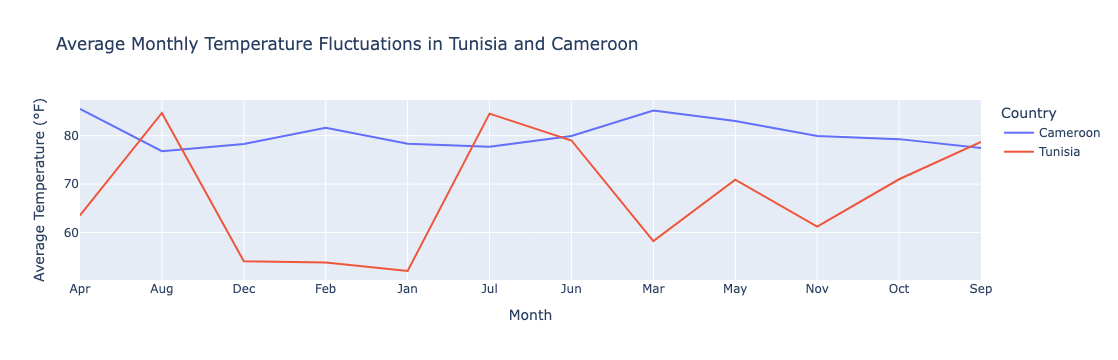

In [48]:


# Group by 'Month' and 'COUNTRY', then calculate the average temperature
df_monthly = df_filtered.groupby(['Month', 'COUNTRY'])['TAVG'].mean().reset_index()

# Create the line chart
fig = px.line(df_monthly, x='Month', y='TAVG', color='COUNTRY',
              title='Average Monthly Temperature Fluctuations in Tunisia and Cameroon',
              labels={'Month': 'Month', 'TAVG': 'Average Temperature (°F)'})

fig.update_layout(legend_title_text='Country')
fig.show()

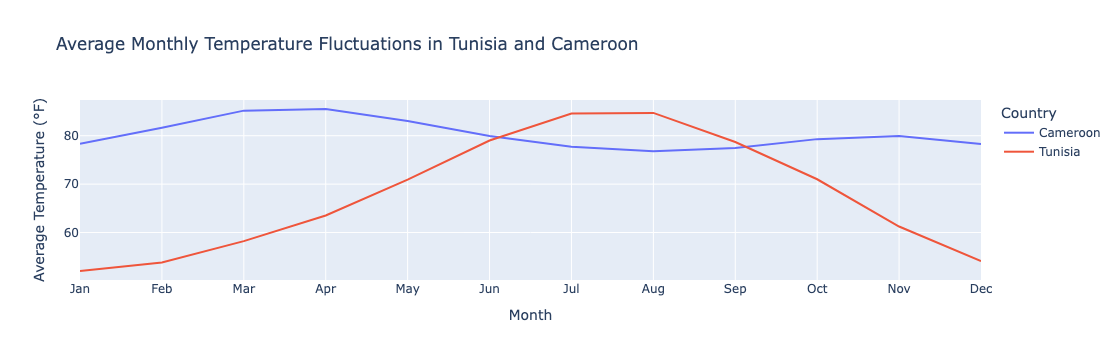

In [50]:
# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to a categorical type with the specified order
df_filtered['Month'] = pd.Categorical(df_filtered['Month'], categories=month_order, ordered=True)

# Group by 'Month' and 'COUNTRY', then calculate the average temperature
df_monthly = df_filtered.groupby(['Month', 'COUNTRY'])['TAVG'].mean().reset_index()

# Create the line chart
fig = px.line(df_monthly, x='Month', y='TAVG', color='COUNTRY',
              title='Average Monthly Temperature Fluctuations in Tunisia and Cameroon',
              labels={'Month': 'Month', 'TAVG': 'Average Temperature (°F)'})

fig.update_layout(legend_title_text='Country')
fig.show()

### Zoom in on the data between 1980 and 2005, and customize the axes labels for better clarity.

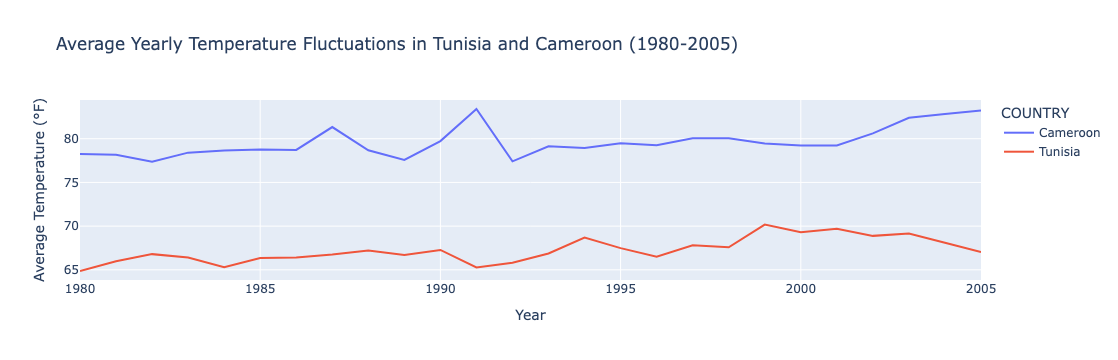

In [52]:
# Filter the data between 1980 and 2005
df_filtered_2 = df_filtered[(df_filtered['Year'] >= 1980) & (df_filtered['Year'] <= 2005)]

# Group by 'Year' and 'COUNTRY', then calculate the average temperature
df_yearly = df_filtered_2.groupby(['Year', 'COUNTRY'])['TAVG'].mean().reset_index()

# Create the line chart
fig = px.line(df_yearly, x='Year', y='TAVG', color='COUNTRY',
              title='Average Yearly Temperature Fluctuations in Tunisia and Cameroon (1980-2005)',
              labels={'Year': 'Year', 'TAVG': 'Average Temperature (°F)'})

# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Temperature (°F)',
    xaxis=dict(
        tickmode='array'
    )
)

### Temperature Distribution in Senegal (1980-2000 vs 2000-2023)

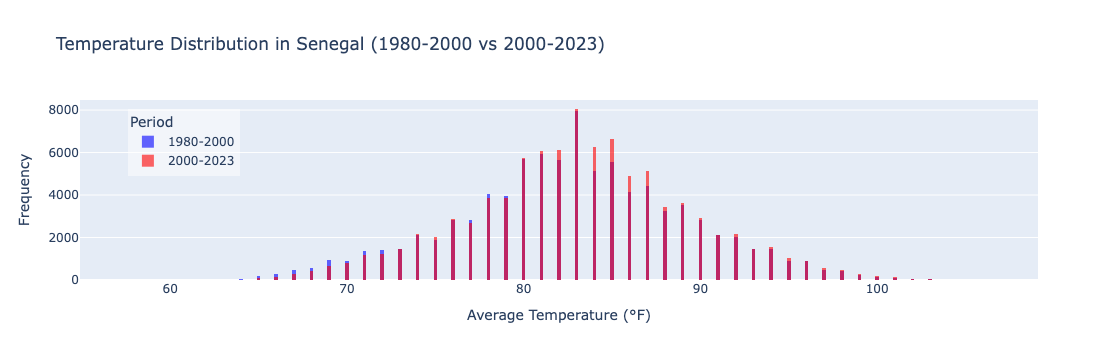

In [54]:
# Filter the data for Senegal
senegal_df = df[df['COUNTRY'] == 'Senegal']

# Extract the year from 'DATE'
senegal_df['Year'] = senegal_df['DATE'].dt.year

# Split the data into two periods: 1980-2000 and 2000-2023
senegal_1980_2000 = senegal_df[(senegal_df['Year'] >= 1980) & (senegal_df['Year'] <= 2000)]
senegal_2000_2023 = senegal_df[(senegal_df['Year'] > 2000) & (senegal_df['Year'] <= 2023)]


# Create histograms
hist_1980_2000 = go.Histogram(
    x=senegal_1980_2000['TAVG'],
    opacity=0.6,
    name='1980-2000',
    marker=dict(color='blue')
)

hist_2000_2023 = go.Histogram(
    x=senegal_2000_2023['TAVG'],
    opacity=0.6,
    name='2000-2023',
    marker=dict(color='red')
)

# Combine histograms in one figure
fig = go.Figure(data=[hist_1980_2000, hist_2000_2023])

# Update layout for better visibility
fig.update_layout(
    barmode='overlay',
    title='Temperature Distribution in Senegal (1980-2000 vs 2000-2023)',
    xaxis_title='Average Temperature (°F)',
    yaxis_title='Frequency',
    legend_title_text='Period',
    legend=dict(
        x=0.05, y=0.95,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)

# Show the figure
fig.show()

From the above Line chart we can see the Tunisia has a lower average Temperature compared to Cameroon
- The peak for Cameroon was in 1991
- The peak for Tunisia was in 1999

### Country-Wise Temperature Visualization

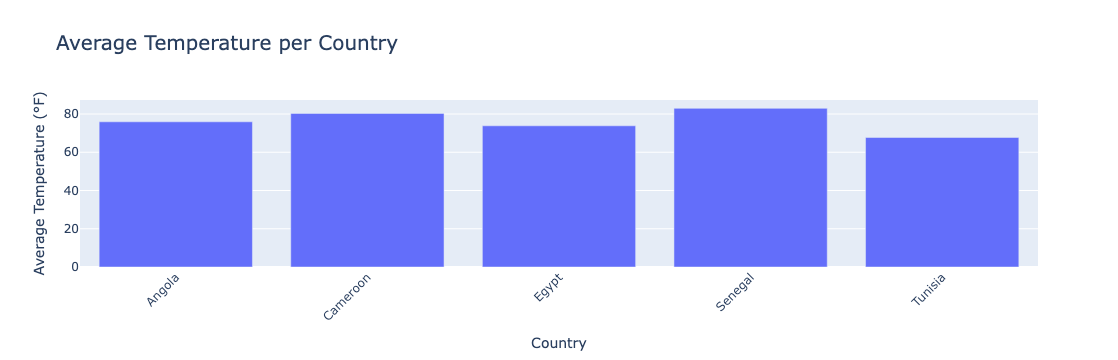

In [56]:
# Group by country and calculate the average temperature
country_avg_temp = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Create a bar chart
fig = px.bar(country_avg_temp, x='COUNTRY', y='TAVG', 
             title='Average Temperature per Country',
             labels={'TAVG': 'Average Temperature (°F)', 'COUNTRY': 'Country'})

# Customize the layout for better clarity
fig.update_layout(xaxis_title='Country', yaxis_title='Average Temperature (°F)', 
                  xaxis_tickangle=-45, 
                  title_font_size=20)

# Show the figure
fig.show()